In [1]:
import pandas as pd
import seaborn as sns
import pybedtools

from scipy.stats import zscore

#load clusters with norm data
clusters_df = pd.read_csv("Files/ZNF808-heatmap-data-final.csv.gz", index_col='Unnamed: 0').sort_index()
clusters_df

,Unnamed: 0.1,chr,start,end,H1wt-S0-H3K27ac.bam,H1wt-S0-H3K9me3.bam,H1wt-S1-H3K27ac.bam,H1wt-S1-H3K9me3.bam,H1wt-S2-H3K27ac.bam,H1wt-S2-H3K9me3.bam,...,iPSCs-S0-H3K27ac.bam,iPSCs-S0-H3K9me3.bam,iPSCs-S1-H3K27ac.bam,iPSCs-S1-H3K9me3.bam,iPSCs-S2-H3K27ac.bam,iPSCs-S2-H3K9me3.bam,iPSCs-S3-H3K27ac.bam,iPSCs-S3-H3K9me3.bam,sort,cluster_sort
0,chr1:67979003-67980077,chr1,67979003,67980077,6.075107,136.440863,2.219812,59.044403,12.902978,88.727140,...,1.143499,11.504310,8.679624,15.176338,9.110694,53.481691,48.531050,29.580760,5,202
1,chr1:72270136-72271223,chr1,72270136,72271223,14.580257,61.914341,2.219812,42.174574,3.970147,29.945410,...,51.457445,4.183385,6.509718,2.845563,5.314572,11.460362,11.266137,15.928101,1,93
2,chr1:77669332-77670426,chr1,77669332,77670426,13.365235,51.595284,15.538681,81.939172,7.940294,57.672641,...,30.874467,4.183385,90.051094,0.000000,25.813633,34.381087,11.266137,18.203544,3,2
3,chr1:79603487-79604485,chr1,79603487,79604485,18.225321,91.724950,5.549529,36.149635,8.932831,79.854426,...,83.475411,4.183385,40.143259,5.691127,0.000000,77.357446,5.199755,45.508861,2,171
4,chr1:84752700-84753781,chr1,84752700,84753781,17.010300,99.750883,11.099058,50.609488,7.940294,85.399873,...,148.654842,1.045846,33.633541,0.000000,5.314572,21.010664,8.666259,15.928101,3,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,chrX:73244715-73245803,chrX,73244715,73245803,24.300428,58.474656,5.549529,30.124695,1.985074,43.254481,...,88.049407,27.192005,8.679624,28.455635,0.000000,58.256842,6.933007,65.987849,1,103
216,chrX:87599611-87600686,chrX,87599611,87600686,19.440343,71.086836,13.318869,48.199513,9.925368,38.818124,...,107.488886,29.283697,21.699059,31.301198,4.555347,97.413080,12.132762,92.155444,1,164
217,chrX:113410189-113411269,chrX,113410189,113411269,9.720171,60.767779,0.000000,39.764598,1.985074,48.799927,...,182.959806,15.687695,24.953918,11.382254,1.518449,50.616600,8.666259,36.407089,2,71
218,chrX:145742986-145744068,chrX,145742986,145744068,3.645064,60.767779,3.329717,28.919708,5.955221,41.036302,...,69.753426,57.521548,23.868965,55.962748,11.388368,84.997687,17.332518,109.221267,1,108


In [2]:
# bed file not included in repo, can be generated from https://www.repeatmasker.org/genomes/hg19/RepeatMasker-rm405-db20140131/hg19.fa.out.gz
repeats = pybedtools.BedTool("Files/hg19_transposons_20140131_sorted.bed").filter(lambda f: False if f.chrom == "chrY" else True).saveas()
MER11_bed = repeats.filter(lambda f: True if f.name in ["MER11A", "MER11B", "MER11C"] else False).sort().saveas()


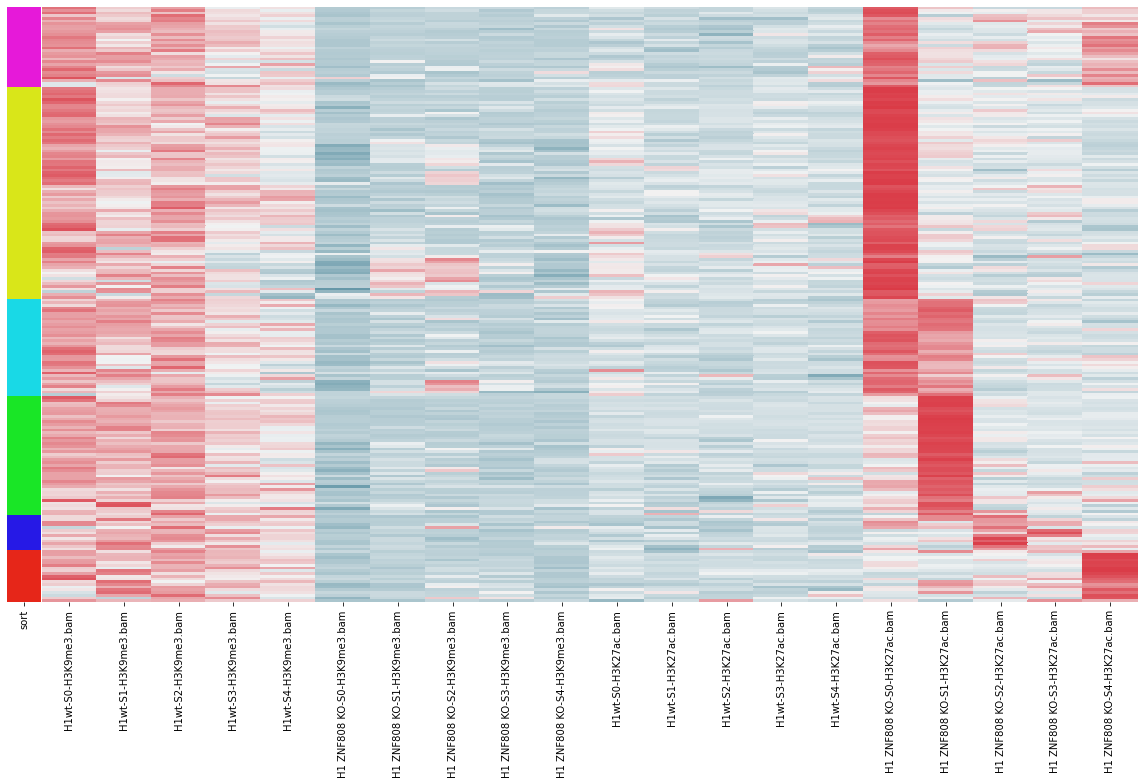

In [3]:
data = clusters_df.copy().iloc[:, 4:]

blue_red_cmap = sns.diverging_palette(220, 10, as_cmap=True, n=10)
metric='cosine'
method = 'average'
molo = 'MOLO-min'

cluster_colors = clusters_df['sort']
lut = dict(zip(cluster_colors.unique(), sns.hls_palette(len(set(cluster_colors.unique())), l=0.5, s=0.8)))
row_colors = cluster_colors.map(lut)

data_norm = data.copy()

data_norm.iloc[:, [0,2,4,6,8,10,12,14,16,18]] = zscore(data_norm.iloc[:, [0,2,4,6,8,10,12,14,16,18]].values, axis=1)
data_norm.iloc[:, [1,3,5,7,9,11,13,15,17,19]] = zscore(data_norm.iloc[:, [1,3,5,7,9,11,13,15,17,19]].values, axis=1)

cluster_colors = pd.Series(clusters_df['sort'])
lut = dict(zip(cluster_colors.unique(), sns.hls_palette(len(set(cluster_colors.unique())), l=0.5, s=0.8)))
row_colors = cluster_colors.map(lut)

plot_data_norm = data_norm.copy()

plot_data_norm['cluster_sort'] = clusters_df['cluster_sort']
plot_data_norm['sort'] = clusters_df['sort']
plot_data_norm.sort_values(['sort', 'cluster_sort'], inplace=True)

df_norm = plot_data_norm.iloc[:, [1,3,5,7,9,11,13,15,17,19,0,2,4,6,8,10,12,14,16,18]]
p = sns.clustermap(df_norm, row_cluster=False, col_cluster=False, figsize=(16, 11), vmin=-3, vmax=3, cmap=blue_red_cmap, xticklabels=True, yticklabels=False, dendrogram_ratio=0.00001, cbar_pos=None, row_colors=row_colors)


In [4]:
plot_data_norm.iloc[:, [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,0,2,4,6,8,10,12,14,16,18,20,22,24,26]]

,H1wt-S0-H3K9me3.bam,H1wt-S1-H3K9me3.bam,H1wt-S2-H3K9me3.bam,H1wt-S3-H3K9me3.bam,H1wt-S4-H3K9me3.bam,H1 ZNF808 KO-S0-H3K9me3.bam,H1 ZNF808 KO-S1-H3K9me3.bam,H1 ZNF808 KO-S2-H3K9me3.bam,H1 ZNF808 KO-S3-H3K9me3.bam,H1 ZNF808 KO-S4-H3K9me3.bam,...,H1wt-S4-H3K27ac.bam,H1 ZNF808 KO-S0-H3K27ac.bam,H1 ZNF808 KO-S1-H3K27ac.bam,H1 ZNF808 KO-S2-H3K27ac.bam,H1 ZNF808 KO-S3-H3K27ac.bam,H1 ZNF808 KO-S4-H3K27ac.bam,iPSCs-S0-H3K27ac.bam,iPSCs-S1-H3K27ac.bam,iPSCs-S2-H3K27ac.bam,iPSCs-S3-H3K27ac.bam
108,2.069646,0.586197,1.314909,-0.107574,0.290278,-1.007864,-0.951767,-0.678440,-0.662843,-0.852542,...,-0.770040,2.468422,0.737373,-0.669131,-0.662445,0.872565,118.923874,65.097177,3.796123,29.465280
34,1.593226,0.398219,1.875287,0.403174,-0.131806,-1.041118,-0.743357,-0.574969,-1.058921,-0.719735,...,-0.937115,2.626523,0.142674,0.039839,0.203571,0.572580,153.228837,5.424765,17.462164,75.396452
98,2.114071,0.874938,0.780309,0.331411,0.292964,-1.126111,-0.873103,-0.825832,-0.878888,-0.689758,...,-0.816572,2.707232,-0.057334,-0.181854,0.205289,0.565712,140.650351,27.123824,3.796123,15.599266
29,0.695746,0.660320,2.164132,0.188381,0.519614,-1.218223,-0.909560,-0.840913,-1.003443,-0.256054,...,-0.400511,2.507924,-0.983699,0.797597,0.420581,0.202659,42.309455,4.339812,15.184490,6.066381
149,1.756282,0.391918,1.763666,0.368283,-0.101909,-0.911159,-0.751129,-0.822079,-0.830912,-0.862962,...,-0.268718,1.646991,0.364099,0.956747,0.775795,0.752705,35.448462,6.509718,12.906817,18.199144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.207234,2.032015,1.304842,0.353983,0.413638,-1.028016,-1.028016,-0.862777,-0.717060,-0.675842,...,-1.494129,0.139178,0.477828,-0.214502,0.299908,2.506720,72.040424,30.378682,0.000000,18.199144
143,-0.398801,2.190497,1.443804,-0.273958,0.287580,-0.723814,-0.639751,-0.792126,0.019815,-1.113245,...,0.076382,-0.296090,1.515322,-0.841913,-0.326185,2.152582,109.775884,251.709083,12.906817,179.391559
181,-0.628715,1.232148,2.197026,0.804526,-0.038059,-0.889160,-0.642577,-0.742833,-0.544953,-0.747403,...,0.791177,-0.332696,-0.486649,-0.452070,0.299784,2.653067,93.766901,47.737929,30.368980,127.394006
85,0.619342,-0.800712,1.278054,1.661521,-0.356872,-1.555642,-0.731558,0.657193,0.234526,-1.005852,...,-0.117186,-0.596811,-0.117255,0.973594,-0.750133,2.564220,4.573995,0.000000,3.036898,12.999388


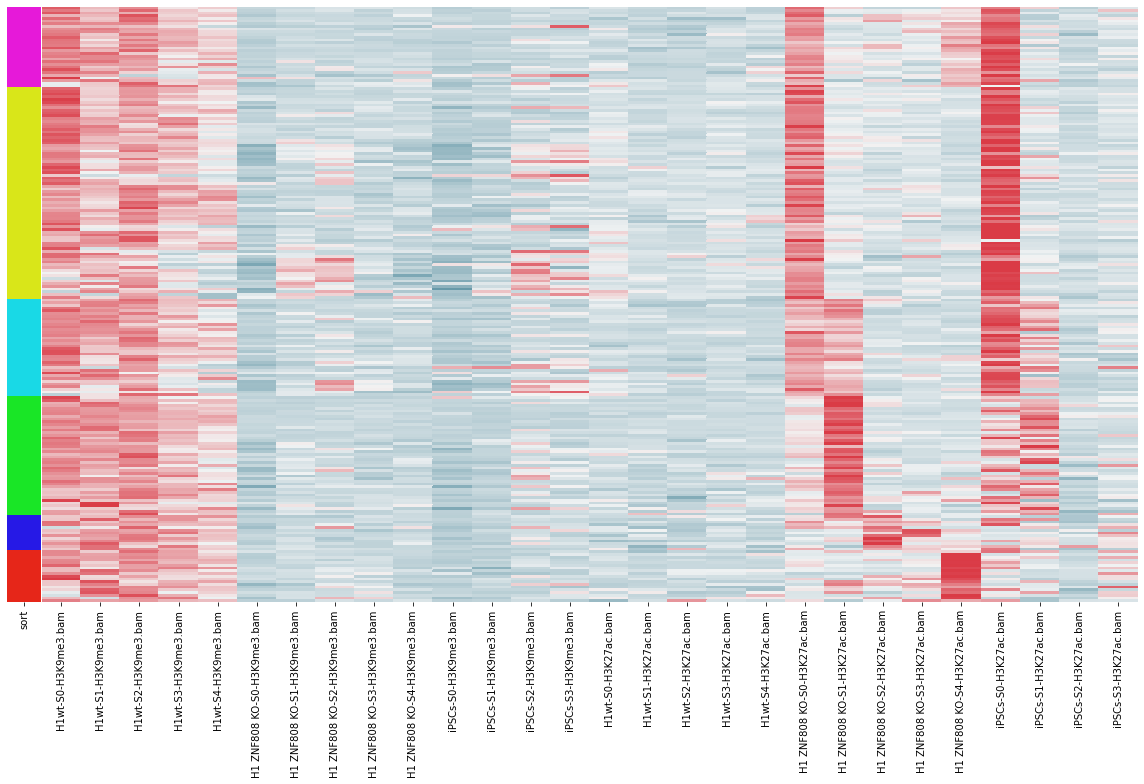

In [5]:
data = clusters_df.copy().iloc[:, 4:]

blue_red_cmap = sns.diverging_palette(220, 10, as_cmap=True, n=10)
metric='cosine'
method = 'average'
molo = 'MOLO-min'

cluster_colors = clusters_df['sort']
lut = dict(zip(cluster_colors.unique(), sns.hls_palette(len(set(cluster_colors.unique())), l=0.5, s=0.8)))
row_colors = cluster_colors.map(lut)

data_norm = data.copy()

data_norm.iloc[:, [0,2,4,6,8,10,12,14,16,18,20,22,24,26]] = zscore(data_norm.iloc[:, [0,2,4,6,8,10,12,14,16,18,20,22,24,26]].values, axis=1)
data_norm.iloc[:, [1,3,5,7,9,11,13,15,17,19,21,23,25,27]] = zscore(data_norm.iloc[:, [1,3,5,7,9,11,13,15,17,19,21,23,25,27]].values, axis=1)

cluster_colors = pd.Series(clusters_df['sort'])
lut = dict(zip(cluster_colors.unique(), sns.hls_palette(len(set(cluster_colors.unique())), l=0.5, s=0.8)))
row_colors = cluster_colors.map(lut)

#cols = [40,41,42,43,44,45,46,47,48,49,50]
#data_norm = data_norm.drop(data_norm.columns[cols], axis=1)

plot_data_norm = data_norm.copy()

plot_data_norm['cluster_sort'] = clusters_df['cluster_sort']
plot_data_norm['sort'] = clusters_df['sort']
plot_data_norm.sort_values(['sort', 'cluster_sort'], inplace=True)

df_norm = plot_data_norm.iloc[:, [1,3,5,7,9,11,13,15,17,19,21,23,25,27,0,2,4,6,8,10,12,14,16,18,20,22,24,26]]
#df_norm = plot_data_norm.iloc[:, [1,3,5,7,9,17,19,21,23,25,0,2,4,6,8,16,18,20,22,24]]
p = sns.clustermap(df_norm, row_cluster=False, col_cluster=False, figsize=(16, 11), vmin=-3, vmax=3, cmap=blue_red_cmap, xticklabels=True, yticklabels=False, dendrogram_ratio=0.00001, cbar_pos=None, row_colors=row_colors)


thickStart
MER11A    11
MER11B    16
MER11C     3
dtype: int64
thickStart
MER11A    15
MER11B    46
MER11C    17
dtype: int64
thickStart
MER11A     5
MER11B    22
MER11C     9
dtype: int64
thickStart
MER11A    10
MER11B    27
MER11C     7
dtype: int64
thickStart
MER11A    6
MER11B    5
MER11C    2
dtype: int64
thickStart
MER11A    7
MER11B    9
MER11C    3
dtype: int64


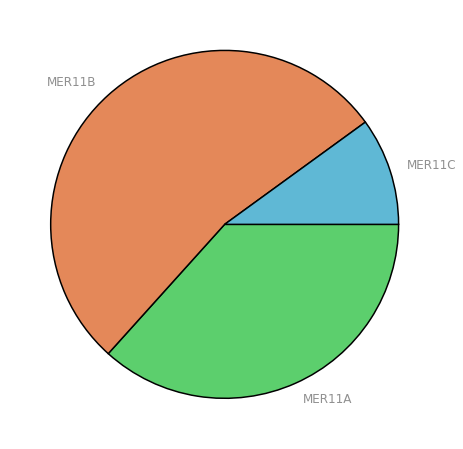

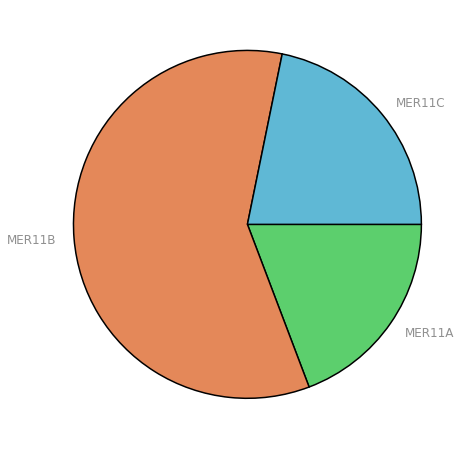

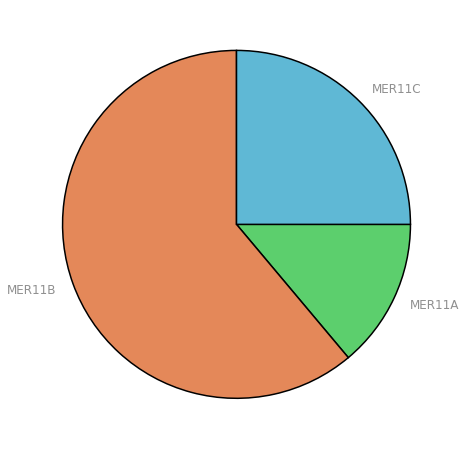

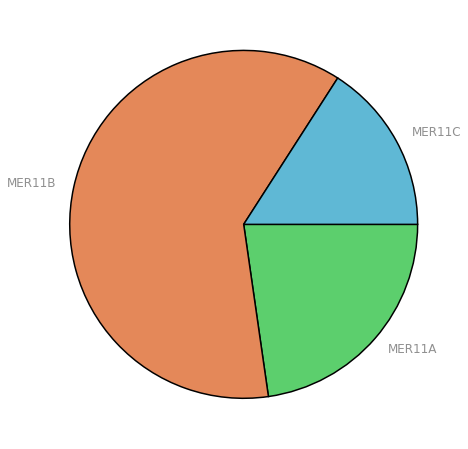

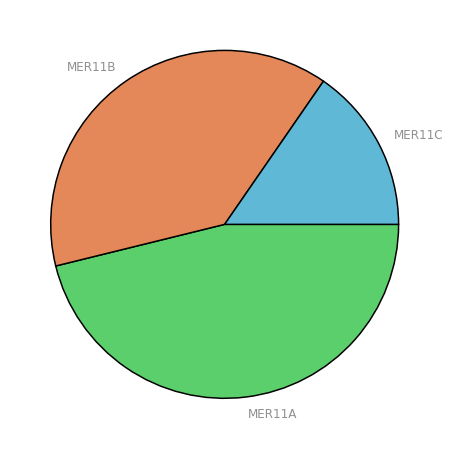

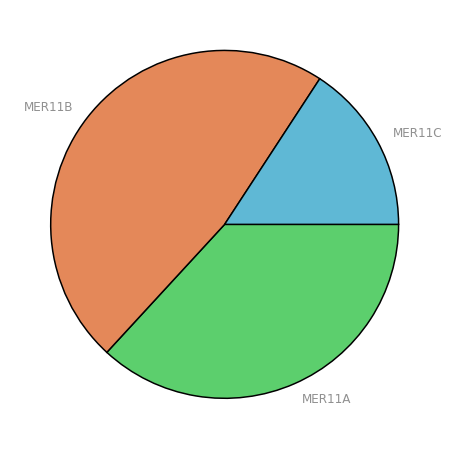

In [6]:
import pybedtools
import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib.font_manager

bed = pybedtools.BedTool().from_dataframe(clusters_df.loc[:, ['chr', 'start', 'end']]).saveas()
#intersect with specific TE families
#create 1 piechart per cluster

bed_intersect_MER11 = bed.intersect(MER11_bed, f=0.5, F=0.5, e=True, sorted=True, wb=True).saveas()

#merge back info to dataframe
clusters_df_merged = clusters_df.merge(bed_intersect_MER11.to_dataframe()['thickStart'], left_index=True, right_index=True)
#print 1 piechart per cluster
groups = clusters_df_merged.groupby(['sort'])

for group in groups:
    #print(group[0])
    print(group[1].groupby(['thickStart']).size())
    kzfp_TE_group_df = pd.DataFrame(group[1].groupby(['thickStart']).size(), columns=['Count'])
    kzfp_TE_group_df["percentage"] = kzfp_TE_group_df / kzfp_TE_group_df.sum()
    kzfp_TE_group_df["significant"] = 0
    kzfp_TE_group_df.loc[kzfp_TE_group_df['percentage'] >= 0.01, 'significant'] = 1

    #print(kzfp_TE_group_df.sort_values(by='percentage'))
    #print(kzfp_TE_group_df.sort_values(by='percentage').sum())
    #print(kzfp_TE_group_df)


    fig, ax = plt.subplots(figsize=(8,8))
    #plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['text.color'] = '#909090'
    plt.rcParams['axes.labelcolor']= '#909090'
    plt.rcParams['xtick.color'] = '#909090'
    plt.rcParams['ytick.color'] = '#909090'
    plt.rcParams['font.size'] = 12

    color_palette_list = ['#5ccf6d', '#e48859', '#5fb8d5', '#999999',]

    labels = ['MER11A', 
              'MER11B',
              'MER11C',
              #'Other families'
             ]

    percentages = [kzfp_TE_group_df.loc['MER11A', 'percentage'], kzfp_TE_group_df.loc['MER11B', 'percentage'], kzfp_TE_group_df.loc['MER11C', 'percentage']]

    explode=(0,0,0,0)
    ax.pie(percentages, labels=labels,  
           colors=color_palette_list,
           shadow=False, startangle=0,    counterclock=False,
           wedgeprops = { 'linewidth':1.5, "edgecolor":"black", 'antialiased': True}
           )